In [116]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

In [117]:
! aws s3 cp s3://nifty-machine-learning-internship-2020/ ./input --recursive

download: s3://nifty-machine-learning-internship-2020/prefecture_area.csv to input/prefecture_area.csv
download: s3://nifty-machine-learning-internship-2020/sample_submission.csv to input/sample_submission.csv
download: s3://nifty-machine-learning-internship-2020/test.csv to input/test.csv
download: s3://nifty-machine-learning-internship-2020/train.csv to input/train.csv
download: s3://nifty-machine-learning-internship-2020/service_use_history.csv to input/service_use_history.csv


In [118]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [119]:
user_history = pd.read_csv('input/service_use_history.csv')

In [120]:
user_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560000 entries, 0 to 1559999
Data columns (total 20 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1560000 non-null  object
 1   service  1560000 non-null  object
 2   1        1560000 non-null  int64 
 3   2        1560000 non-null  int64 
 4   3        1560000 non-null  int64 
 5   4        1560000 non-null  int64 
 6   5        1560000 non-null  int64 
 7   6        1560000 non-null  int64 
 8   7        1560000 non-null  int64 
 9   8        1560000 non-null  int64 
 10  9        1560000 non-null  int64 
 11  10       1560000 non-null  int64 
 12  11       1560000 non-null  int64 
 13  12       1560000 non-null  int64 
 14  13       1560000 non-null  int64 
 15  14       1560000 non-null  int64 
 16  15       1560000 non-null  int64 
 17  16       1560000 non-null  int64 
 18  17       1560000 non-null  int64 
 19  18       1560000 non-null  int64 
dtypes: int64(18), object(2)


In [121]:
user_history.head()

,user_id,service,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,SSEZIM80822,ニフティ会員特別でんきプラン,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,SSEZIM80822,ニフティ会員特別ガスプラン,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,SSEZIM80822,ココログ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,SSEZIM80822,@niftyゲーム,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,SSEZIM80822,占い@nifty,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1


In [122]:
merge_df = pd.merge(user_history, train)

In [123]:
merge_df.groupby('user_id').count()['service']

user_id
AAABGY38277    13
AAACAO14849    13
AAAEFM09396    13
AAAKDN04796    13
AAAVIU66062    13
               ..
ZZZAZC59621    13
ZZZBJS33949    13
ZZZHTV57785    13
ZZZOLR31128    13
ZZZTCL58697    13
Name: service, Length: 100000, dtype: int64

In [124]:
merge_df.groupby('user_id').count()['service'].sort_values(ascending=False)

user_id
ZZZTCL58697    13
IQQTAZ84183    13
IQMDOQ33602    13
IQMKKJ02602    13
IQMLVE93988    13
               ..
RJDNTZ51771    13
RJDONK25765    13
RJDYLG37123    13
RJEKRH45569    13
AAABGY38277    13
Name: service, Length: 100000, dtype: int64

In [125]:
#各ユーザは、１３個のプランに申し込んでいる

In [126]:
month_columns= []
for i in range(1, 19):
    month_columns.append(str(i))

In [127]:
merge_df[month_columns]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1299996,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1299997,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1299998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [128]:
y_count_values = merge_df.sum(axis=1)
df_concat = pd.concat([merge_df, y_count_values], axis=1)

In [129]:
import matplotlib.pyplot as plt

In [130]:
y_count_values_no = y_count_values[df_concat['close_flag']==0]
y_count_values_yes = y_count_values[df_concat['close_flag']==1]

(array([[644854.,  34743.,  34213.,  65172.,  16029.,  12836.,  28912.,
          18832.,  20462., 294103.],
        [ 74839.,   4629.,   4319.,   8212.,   2888.,   1511.,   2899.,
           1720.,   2056.,  26771.]]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <a list of 2 Lists of Patches objects>)

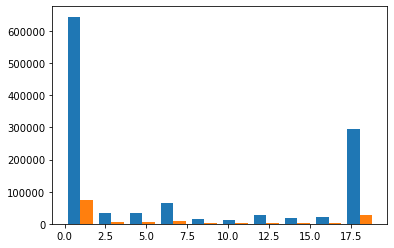

In [131]:
plt.hist([y_count_values_no, y_count_values_yes], label=['継続日数のカウント数', '目的変数'])

In [132]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

In [133]:
datetime_columns = ['entry_date', 'open_date', 'birthday']
for column in datetime_columns:
    train = train.drop(column, axis=1)

train = train.drop('user_agent', axis=1)

train.head()

,user_id,id_status,gender,blood_type,pay_method_type,course_name,price_type,entry_from,privilege_name,prefecture,close_flag
0,YKJGBC19356,新規,男性,A,クレジットカード,@nifty光,マンション2年プラン,代理店取次,キャッシュバック還元,鹿児島,0
1,JMFEBB08712,新規,女性,O,クレジットカード,@nifty光,ホーム2年プラン,代理店取次,付帯サービス無料,北海道,0
2,EXLFTB26665,既存,女性,AB,クレジットカード,@nifty auひかり,ホーム2年プラン,ノジマ取次,月額割引還元,長野,0
3,MWEEMY19722,新規,男性,B,クレジットカード,@nifty光,マンション2年プラン,代理店取次,キャッシュバック還元,福島,0
4,WWTLYT31226,新規,男性,A,クレジットカード,@nifty auひかり,マンション3年プラン,WEB代理店,付帯サービス無料,愛知,0


In [134]:
train = train.set_index('user_id')
train.head()

,id_status,gender,blood_type,pay_method_type,course_name,price_type,entry_from,privilege_name,prefecture,close_flag
user_id,,,,,,,,,,
YKJGBC19356,新規,男性,A,クレジットカード,@nifty光,マンション2年プラン,代理店取次,キャッシュバック還元,鹿児島,0
JMFEBB08712,新規,女性,O,クレジットカード,@nifty光,ホーム2年プラン,代理店取次,付帯サービス無料,北海道,0
EXLFTB26665,既存,女性,AB,クレジットカード,@nifty auひかり,ホーム2年プラン,ノジマ取次,月額割引還元,長野,0
MWEEMY19722,新規,男性,B,クレジットカード,@nifty光,マンション2年プラン,代理店取次,キャッシュバック還元,福島,0
WWTLYT31226,新規,男性,A,クレジットカード,@nifty auひかり,マンション3年プラン,WEB代理店,付帯サービス無料,愛知,0


In [135]:
category_columns = ['id_status', 'gender', 'blood_type', 'pay_method_type', 'course_name', 'price_type', 'entry_from', 'privilege_name', 'prefecture']

encoders = {}
for column in category_columns:
    le = LabelEncoder()
    le.fit(train[column])
    train[column] = le.transform(train[column])
    encoders[column] = le

In [136]:
customer_mean_period=df_concat.groupby('user_id', as_index=False).mean().iloc[:, [0,-1]]
customer_mean_period = customer_mean_period.rename(columns={0: 'customer_period'})

In [137]:
train_data = pd.read_csv('input/train.csv')
train_data = pd.merge(train_data, customer_mean_period)

In [138]:
datetime_columns = ['entry_date', 'open_date', 'birthday']
for column in datetime_columns:
    train_data = train_data.drop(column, axis=1)

In [139]:
train_data = train_data.drop('user_agent', axis=1)


In [140]:
category_columns = ['id_status', 'gender', 'blood_type', 'pay_method_type', 'course_name', 'price_type', 'entry_from', 'privilege_name', 'prefecture']

encoders = {}
for column in category_columns:
    le = LabelEncoder()
    le.fit(train_data[column])
    train_data[column] = le.transform(train_data[column])
    encoders[column] = le
    
train_data.head()

,user_id,id_status,gender,blood_type,pay_method_type,course_name,price_type,entry_from,privilege_name,prefecture,close_flag,customer_period
0,YKJGBC19356,0,1,0,1,2,2,3,0,47,0,5.307692
1,JMFEBB08712,0,0,3,1,2,0,3,1,5,0,5.923077
2,EXLFTB26665,1,0,1,1,0,0,2,2,41,0,7.692308
3,MWEEMY19722,0,1,2,1,2,2,3,0,36,0,5.307692
4,WWTLYT31226,0,1,0,1,0,3,0,1,25,0,8.769231


In [141]:
from sklearn.ensemble import GradientBoostingClassifier

In [142]:

train_data = train_data.set_index('user_id')
y = train_data['close_flag']
X = train_data.drop('close_flag', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(90000, 10) (10000, 10) (90000,) (10000,)


In [143]:
clf =GradientBoostingClassifier(
    min_samples_split = 5, 
    min_samples_leaf = 50, 
    max_depth = 5, 
    max_features = 'sqrt', 
    subsample = 0.8)

In [144]:
clf.fit(X_train,y_train )

GradientBoostingClassifier(max_depth=5, max_features='sqrt',
                           min_samples_leaf=50, min_samples_split=5,
                           subsample=0.8)

In [145]:
clf.fit(X_train,y_train )
y_pred_prob = clf.predict_proba(X_test)[:,1]
y_pred_prob = clf.predict_proba(X_test)[:,1]
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]
print(f'accuracy_score: {accuracy_score(y_test, y_pred)}')
print(f'roc_auc_score: {roc_auc_score(y_test, y_pred_prob)}')

accuracy_score: 0.9052
roc_auc_score: 0.7488785493473247


In [146]:
test_merge_df = pd.merge(user_history, test)
test_y_count_values = test_merge_df.sum(axis=1)
df_concat = pd.concat([test_merge_df, test_y_count_values], axis=1)
customer_mean_period=df_concat.groupby('user_id', as_index=False).mean().iloc[:, [0,-1]]
customer_mean_period = customer_mean_period.rename(columns={0: 'customer_period'})
test = pd.merge(test, customer_mean_period)

test = test.set_index('user_id')

datetime_columns = ['entry_date', 'open_date', 'birthday']
for column in datetime_columns:
    test = test.drop(column, axis=1)
test = test.drop('user_agent', axis=1)

category_columns = ['id_status', 'gender', 'blood_type', 'pay_method_type', 'course_name', 'price_type', 'entry_from', 'privilege_name', 'prefecture']
for column in category_columns:
    le = encoders[column]
    le.fit(test[column])
    test[column] = le.transform(test[column])

In [147]:
submission = pd.DataFrame({'user_id': test.index, 'close_flag': clf.predict_proba(test)[:,1]})
submission.head()

,user_id,close_flag
0,HLSZTB50403,0.167944
1,FCQNUE35187,0.126464
2,IYSBZQ82404,0.141738
3,BPIREY57201,0.143703
4,ISWWBF46615,0.071985


In [148]:
submission.to_csv('output/submit3.csv', index=False)

In [149]:
!pip install xgboost
import xgboost as xgb

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p36/bin/python -m pip install --upgrade pip' command.


In [150]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve

def model_validation(train_x, train_y, test):
    scores = []
    kf = KFold(n_splits=4, shuffle=True, random_state=71)
    for tr_idx, va_idx in kf.split(train_x):
        tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
        tr_y, va_y = train_y[tr_idx], train_y[va_idx]
        clf_xgb = xgb.XGBClassifier()
        clf_xgb.fit(tr_x, tr_y,
            eval_set=[(va_x, va_y)])
        va_pred  = clf_xgb.predict(va_x)

        print(f'roc_auc_score: {roc_auc_score(va_y, va_pred)}')
        score = roc_auc_score(va_y, va_pred)
        scores.append(score)
    print(np.mean(scores))
    return clf_xgb.predict(test)

In [151]:
def under_sampling_func(X,num,label) :

    # KMeansによるクラスタリング
    from sklearn.cluster import KMeans
    km = KMeans(random_state=201707)
    km.fit(X,Y)
    X['Cluster'] = km.predict(X)

    # 群別の構成比を少数派の件数に乗じて群別の抽出件数を計算
    count_sum = X.groupby('Cluster').count().iloc[0:,0].as_matrix()
    ratio = count_sum / count_sum.sum()
    samp_num = np.round(ratio * num,0).astype(np.int32)

    # 群別にサンプリング処理を実施
    for i in np.arange(8) :
        tmp = X[X['Cluster']==i]
        if i == 0 :
            tmp1 = X.sample(samp_num[i],replace=True)
        else :
            tmp2 = X.sample(samp_num[i],replace=True)
            tmp1 = pd.concat([tmp1,tmp2])
    tmp1['Class'] = label
    return tmp1

In [152]:
train_sampling = pd.read_csv('input/train.csv')
test_sampling = pd.read_csv('input/test.csv')

(array([90012.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  9988.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

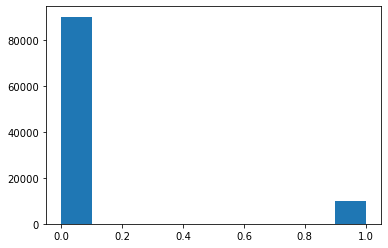

In [156]:
plt.hist(train_sampling['close_flag'])

In [160]:
flug1_count = train_sampling[train_sampling['close_flag']==1]['close_flag'].count()

In [159]:
train_sampling[train_sampling['close_flag']==0]['close_flag'].count()

90012

In [193]:
# X=train_sampling.drop('close_flag', axis=1)
X = train_sampling.drop('close_flag', axis=1)
y = train_sampling['close_flag']
datetime_columns = ['entry_date', 'open_date', 'birthday']
for column in datetime_columns:
    X = X.drop(column, axis=1)
X = X.drop('user_agent', axis=1)
X = X.drop('user_id', axis=1)
category_columns = ['id_status', 'gender', 'blood_type', 'pay_method_type', 'course_name', 'price_type', 'entry_from', 'privilege_name', 'prefecture']
for column in category_columns:
    le = encoders[column]
    le.fit(X[column])
    X[column] = le.transform(X[column])
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

def imbalanced_data_split(X, y, test_size=0.2):
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
    for train_index, test_index in sss.split(X, y):
        print(train_index)
        X_train, X_test = X.loc[train_index, :], X.loc[test_index, :]
        y_train, y_test = y[train_index], y[test_index]
        return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = imbalanced_data_split(X, y, test_size=0.2)
# for validation
X_train2, X_valid, y_train2, y_valid = train_test_split(X_train, y_train, test_size=0.2)

[39617   855 47187 ... 66600 19738 82188]


In [182]:
!pip install lightgbm

     |████████████████████████████████| 1.7 MB 10.2 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p36/bin/python -m pip install --upgrade pip' command.


In [194]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

lgbm_params = {
    'learning_rate': 0.1,
    'num_leaves': 8,
    'boosting_type' : 'gbdt',
    'reg_alpha' : 1,
    'reg_lambda' : 1,
    'objective': 'binary',
    'metric': 'auc',
}

def lgbm_train(X_train_df, X_valid_df, y_train_df, y_valid_df, lgbm_params):
    lgb_train = lgb.Dataset(X_train_df, y_train_df)
    lgb_eval = lgb.Dataset(X_valid_df, y_valid_df, reference=lgb_train)

    # 上記のパラメータでモデルを学習する
    model = lgb.train(lgbm_params, lgb_train,
                      # モデルの評価用データを渡す
                      valid_sets=lgb_eval,
                      # 最大で 1000 ラウンドまで学習する
                      num_boost_round=1000,
                      # 10 ラウンド経過しても性能が向上しないときは学習を打ち切る
                      early_stopping_rounds=10)
    
    return model

In [195]:
model_normal = lgbm_train(X_train2, X_valid, y_train2, y_valid, lgbm_params)
y_pred_normal = model_normal.predict(X_test, num_iteration=model_normal.best_iteration)

# auc を計算する
auc = roc_auc_score(y_test, y_pred_normal)
print(auc)

[LightGBM] [Info] Number of positive: 6379, number of negative: 57621
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 76
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.099672 -> initscore=-2.200876
[LightGBM] [Info] Start training from score -2.200876
[1]	valid_0's auc: 0.618749
Training until validation scores don't improve for 10 rounds
[2]	valid_0's auc: 0.653952
[3]	valid_0's auc: 0.679468
[4]	valid_0's auc: 0.680412
[5]	valid_0's auc: 0.680509
[6]	valid_0's auc: 0.68501
[7]	valid_0's auc: 0.687231
[8]	valid_0's auc: 0.688249
[9]	valid_0's auc: 0.694383
[10]	valid_0's auc: 0.698989
[11]	valid_0's auc: 0.70137
[12]	valid_0's auc: 0.701873
[13]	valid_0's auc: 0.704847
[14]	valid_0's a

In [197]:
!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler(random_state=42)
# downsampling
X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
# for validation
X_train2, X_valid, y_train2, y_valid = imbalanced_data_split(X_resampled, y_resampled, test_size=0.2)

     |████████████████████████████████| 167 kB 13.8 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p36/bin/python -m pip install --upgrade pip' command.
[ 2938 15428 10749 ...  2093 15930 13693]


(array([7990.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7990.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

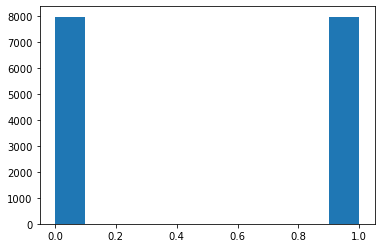

In [204]:
plt.hist(y_resampled)

In [205]:
model_under_sample = lgbm_train(X_train2, X_valid, y_train2, y_valid, lgbm_params)


[LightGBM] [Info] Number of positive: 6392, number of negative: 6392
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 76
[LightGBM] [Info] Number of data points in the train set: 12784, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[1]	valid_0's auc: 0.606076
Training until validation scores don't improve for 10 rounds
[2]	valid_0's auc: 0.607081
[3]	valid_0's auc: 0.658011
[4]	valid_0's auc: 0.659639
[5]	valid_0's auc: 0.6605
[6]	valid_0's auc: 0.677231
[7]	valid_0's auc: 0.683277
[8]	valid_0's auc: 0.683617
[9]	valid_0's auc: 0.692754
[10]	valid_0's auc: 0.702581
[11]	valid_0's auc: 0.702467
[12]	valid_0's auc: 0.703218
[13]	valid_0's auc: 0.709062
[14]	valid_0's auc: 0.715464
[15]	valid_0's auc: 0.714837
[16]	valid_0's

In [206]:
def bagging(seed):
    sampler = RandomUnderSampler(random_state=seed, replacement=True)
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    X_train2, X_valid, y_train2, y_valid = imbalanced_data_split(X_resampled, y_resampled, test_size=0.2)
    model_bagging = lgbm_train(X_train2, X_valid, y_train2, y_valid, lgbm_params)
    return model_bagging

In [207]:
%%time
models = []

for i in range(10):
    models.append(bagging(i))

[ 2938 15428 10749 ...  2093 15930 13693]
[LightGBM] [Info] Number of positive: 6392, number of negative: 6392
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 76
[LightGBM] [Info] Number of data points in the train set: 12784, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[1]	valid_0's auc: 0.614669
Training until validation scores don't improve for 10 rounds
[2]	valid_0's auc: 0.633079
[3]	valid_0's auc: 0.643412
[4]	valid_0's auc: 0.667928
[5]	valid_0's auc: 0.669054
[6]	valid_0's auc: 0.676272
[7]	valid_0's auc: 0.674874
[8]	valid_0's auc: 0.673867
[9]	valid_0's auc: 0.679047
[10]	valid_0's auc: 0.679576
[11]	valid_0's auc: 0.683217
[12]	valid_0's auc: 0.682732
[13]	valid_0's auc: 0.690798
[14]	valid_0's auc: 0.690106

In [208]:
y_preds = []

for m in models:
    y_preds.append(m.predict(X_test, num_iteration=m.best_iteration))

y_preds_bagging = sum(y_preds)/len(y_preds)
# auc を計算する
auc = roc_auc_score(y_test, y_preds_bagging)
print(auc)

0.7256719557019524


In [213]:
clf.fit(X_train2,y_train2 )
y_pred_prob = clf.predict_proba(X_valid)[:,1]
y_pred_prob = clf.predict_proba(X_valid)[:,1]
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]
print(f'accuracy_score: {accuracy_score(y_valid, y_pred)}')
print(f'roc_auc_score: {roc_auc_score(y_valid, y_pred_prob)}')

accuracy_score: 0.6714643304130162
roc_auc_score: 0.7308891668402775
